In [3]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#바로 그림을 볼 수 있도록 해주는 코드 부분

# 사이킷런에 내장된 유방암 데이터셋을 불러오는 것
raw_df=load_breast_cancer()
features = raw_df.data
labels =raw_df.target

cancer_df=pd.DataFrame(data= features, columns= raw_df.feature_names)
cancer_df['target']=labels


In [4]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
#EDA

cancer_df.shape

(569, 31)

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
print(raw_df.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [9]:
cancer_df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Text(0.5, 1.0, 'Feature Correlation')

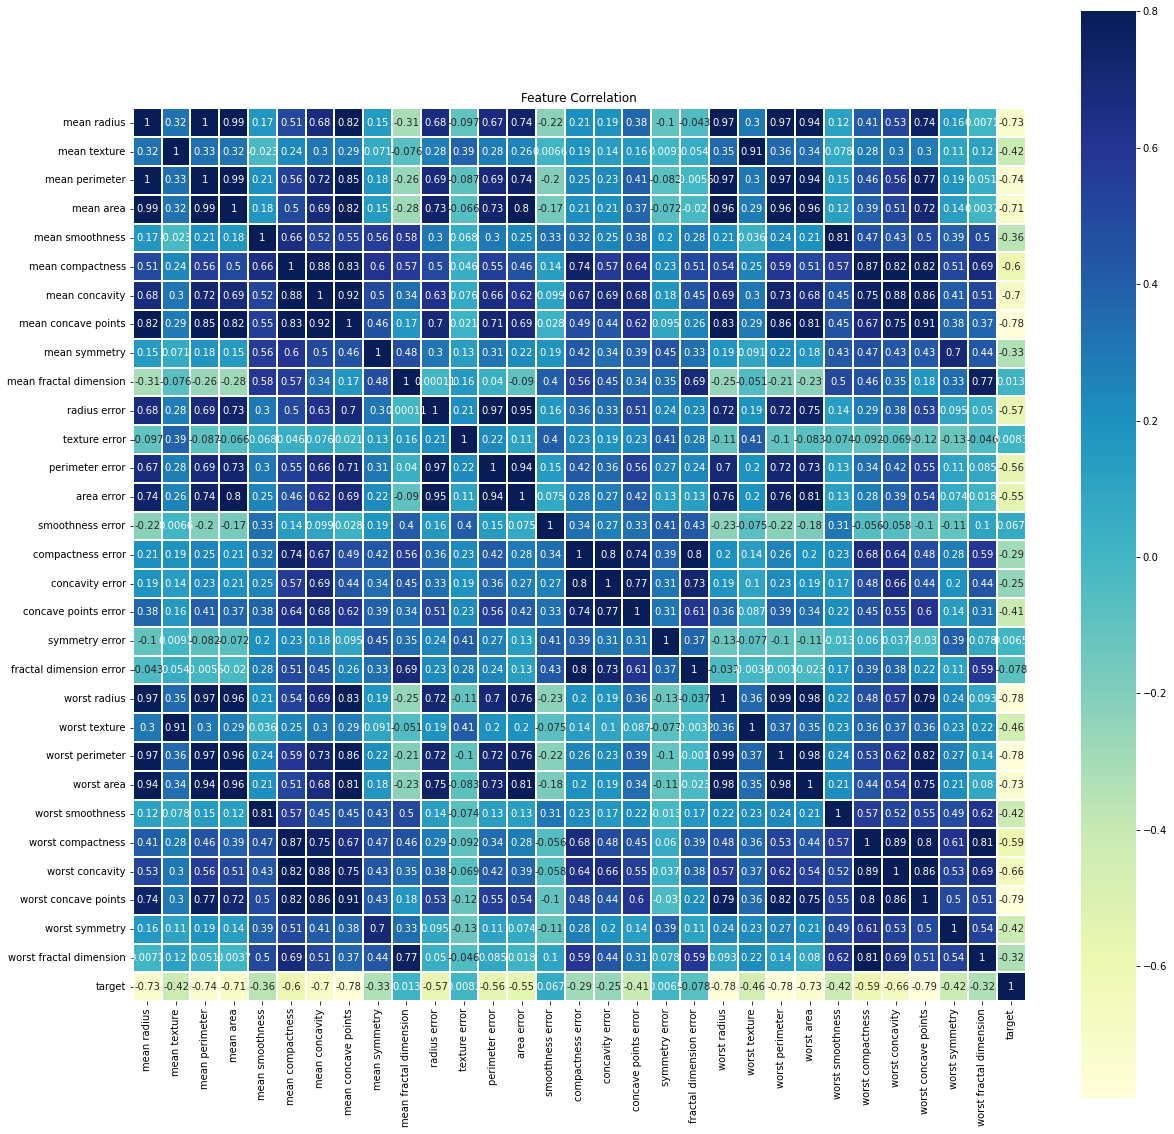

In [11]:
#상관관계 히트맵

corr=cancer_df.corr()
plt.figure(figsize=(20,20));
sns.heatmap(corr, 
           vmax=0.8,
           linewidths=0.01,
           square=True,
           annot=True,
           cmap='YlGnBu');

plt.title('Feature Correlation')

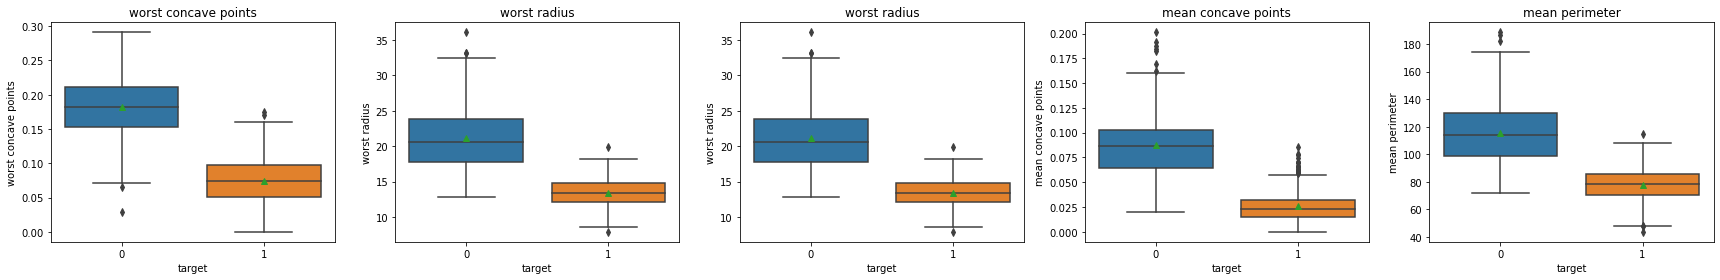

In [18]:
cols=['worst concave points', 'worst radius','worst radius', 'mean concave points','mean perimeter']
figure, ax_list_list = plt.subplots(nrows=1, ncols=5)

ax_list = ax_list_list.reshape(5)
figure.set_size_inches(24,4)

for i in range(len(cols)):
    col = cols[i]
    sns.boxplot(data = cancer_df, 
                x = 'target',
                y = col, 
                showfliers = True, showmeans = True,
                ax = ax_list[i])
    ax_list[i].set_title(col)
    
plt.tight_layout()
plt.show()

In [19]:
#train-test data를 분리하는 과정 8:2로

y=cancer_df['target']
X = cancer_df.drop(columns='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 156)

print('학습용 데이터셋(train data) 행 개수: {}'.format(X_train.shape[0]))
print('테스트용 데이터셋(test data) 행 개수: {}'.format(X_test.shape[0]))

학습용 데이터셋(train data) 행 개수: 455
테스트용 데이터셋(test data) 행 개수: 114


In [20]:
#GBM 이용

# GBM 수행 시간 측정
start_time = time.time()

# 모델 설정
gb_clf = GradientBoostingClassifier(random_state = 0)
#random_state: 난수 생성
gb_clf.fit(X_train, y_train)
#.fit() =훈련하라

# GBM 학습 및 예측 성능 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
#정답과 예측값 비교 -> 정확도 확인

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9561
GBM 수행 시간: 0.5 초


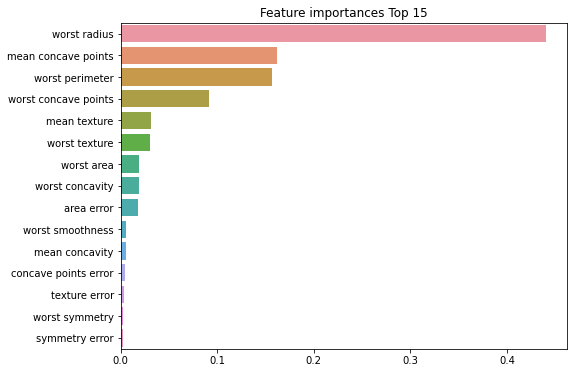

In [21]:
# feature_importances_ 속성을 이용해 변수 중요도 시각화하기

ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x = ftr_top15, y = ftr_top15.index)
plt.show()

In [23]:
# GridSearchCV 수행 시간 측정
start_time = time.time()

params = {
    'n_estimators': [100, 300, 500], 
    'max_depth': [6, 10],
    'min_samples_leaf': [6, 8, 12],
    'min_samples_split': [8, 16],
    'learning_rate': [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2)
grid_cv.fit(X_train, y_train)

print('최적의 파라미터 :',grid_cv.best_params_)
print('최고의 예측 정확도 :{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

최적의 파라미터 : {'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고의 예측 정확도 :0.9627
GridSearchCV 수행 시간: 106.3 초


In [24]:
# GBM 수행 시간 측정
start_time = time.time()

# 하이퍼 파라미터 조정한 모델 gb_clf2
gb_clf2 = GradientBoostingClassifier(learning_rate = 0.05,    # 기존 모델 0.1
                                     max_depth = 6,           # 기존 모델 3 
                                     min_samples_leaf = 8,    # 기존 모델 1
                                     min_samples_split = 8,   # 기존 모델 2
                                     n_estimators = 300)      # 기존 모델 100
gb_clf2.fit(X_train, y_train)

# 모델 학습 및 예측 성능 평가
gb_pred2 = gb_clf2.predict(X_test)
gb_accuracy2 = accuracy_score(y_test, gb_pred2)

print('하이퍼 파라미터 조정하기 전 GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('하이퍼 파라미터 조정한 후 GBM 정확도: {0:.4f}'.format(gb_accuracy2))
print('하이퍼 파라미터 조정한 GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

하이퍼 파라미터 조정하기 전 GBM 정확도: 0.9561
하이퍼 파라미터 조정한 후 GBM 정확도: 0.9649
하이퍼 파라미터 조정한 GBM 수행 시간: 1.7 초
